# <font color=green> Home Work 3 </font>
## Part 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the csv document
salaries_df = pd.read_csv("ds_salaries.csv")
salaries_df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,MI,CT,ML Engineer,30000,fully remote,S
1,MI,CT,ML Engineer,25500,fully remote,S
2,SE,FT,Applied Scientist,222200,hybrid,L
3,SE,FT,Applied Scientist,136000,hybrid,L
4,SE,FT,Data Scientist,147100,hybrid,M


### Question 1:
#### a)
- H0 - The data represents well the population of Data profession - 35% works remotely.
- H1 - The data does NOT represent well the population of Data profession - less than 35% works remotely.

#### b)
##### The test statistic is the percent of remote working employees in the Data profession in the sample

In [3]:
sample_size = salaries_df.shape[0]
num_of_remote_employees = salaries_df[salaries_df['remote_ratio'] == 'fully remote'].shape[0]
test_statistic = num_of_remote_employees / sample_size
print("The test statistic is: ", test_statistic*100, "%")

The test statistic is:  32.46006389776358 %


#### c)
##### We want to sample people from the population of Data profession and check if the proportion of Data profession in the sample is within the confidence interval of 95% of the population of Data profession.

In [4]:
population = ['fully remote', 'hybrid']
prob_population = [0.35, 0.65] # probabilities of selection GIVEN THE MODEL IS TRUE


# sample one value
def prob_fully_remote():
    sample_companies = np.random.choice(population, p=prob_population, size=sample_size)
    num_remote = np.count_nonzero(sample_companies == 'fully remote')
    return num_remote

# run the experiment 10000 times
num_rep = 10000
samples = np.array([prob_fully_remote() for i in range(num_rep)])

We got $p_{value}<0.05$, which means that the observed case is part of the 5% tail of the empirical distribution. Therefore, assuming significance level of 0.05, we will reject the null hypothesis. That is, we can reject the hypothesis that the data represents well the population of Data profession.

p-value = 0.0178


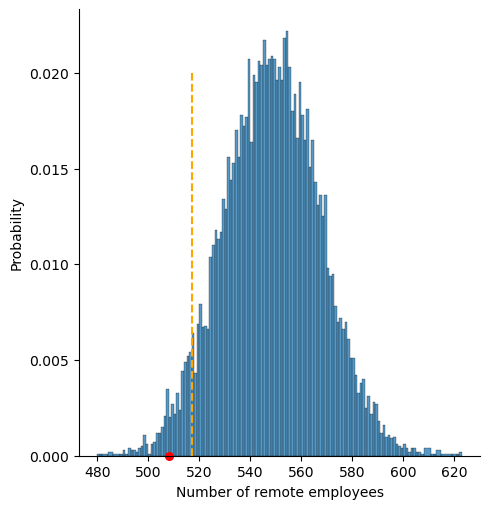

In [5]:
# visualize the distribution
distirbution = sns.displot(samples, bins=np.unique(samples), stat='probability')
df_prob = num_of_remote_employees
distirbution.axes[0,0].scatter(df_prob, 0, color='red', s=30, clip_on=False)
distirbution.axes[0,0].set_xlabel('Number of remote employees')
distirbution.axes[0,0].vlines(np.percentile(samples, 5), 0, 0.02, color='orange', linestyles='dashed')
# distirbution.axes[0,0].scatter(df_prob, 0, color='red', s=40, clip_on=False)
p_value = np.count_nonzero(samples <= df_prob) / num_rep
print('p-value =', p_value)

### Question 2:
#### a)
  - 𝐻0 - The mean salary of Data Scientists is equal to the mean salary of Data Engineers
  - 𝐻1 - The mean salary of Data Scientists is NOT equal to the mean salary of Data Engineers

#### b)
##### The static test is the difference between the mean of the salary of Data Scientists and the mean of the salary of Data Engineers

In [6]:
mean_data_scientist_salary = salaries_df[salaries_df['job_title'] == 'Data Scientist']['salary_in_usd'].mean()
mean_data_engineer_salary = salaries_df[salaries_df['job_title'] == 'Data Engineer']['salary_in_usd'].mean()
test_statistic = mean_data_scientist_salary - mean_data_engineer_salary
print("The test statistic is: ", test_statistic)

The test statistic is:  12686.679782082327


#### c)
##### We are going to check the null hypothesis with a bootstrap method.

In [7]:
#create a df with the two categorical that we want
dataScientist_dataEngineer_df = salaries_df[(salaries_df['job_title'] == 'Data Scientist') |
                                            (salaries_df['job_title'] == 'Data Engineer')]
def diff_of_avgs(df, column_name, grouping_var):
    '''This function returns the difference in averages
    df: the original df
    column_name: the name of the column that we are going to calculate the mean on
    grouping_var: the name of the column that we use to groupby'''
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
    original_sample: df containing the original sample
    column_name: name of column containing the variable to average
    grouping_var: name of variable according to which to group
    num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True)
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(dataScientist_dataEngineer_df, 'salary_in_usd', 'job_title',  5000)

4)d)
The 99% boostsrap confidence interval is [2855.0079647237144, 23098.72372469635]
The 95% boostsrap confidence interval is [4983.178286010429, 20347.05222978079]


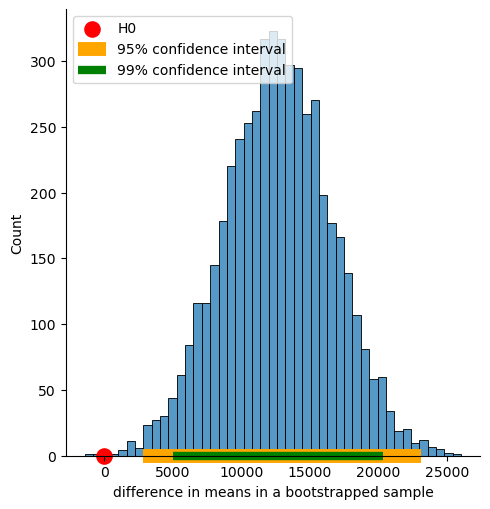

In [8]:
# Visualize the distribution
ax = sns.displot(bstrap_diffs)
ax.set(xlabel='difference in means in a bootstrapped sample')
confidence_interval = 1
color = 'orange'
plt.scatter(0, 0, color='red', s=120, clip_on=False)

print("4)d)")
for i in range(2):
    left_end = np.percentile(bstrap_diffs, confidence_interval/2, method='higher')
    right_end =  np.percentile(bstrap_diffs, 100-confidence_interval/2, method='higher')
    print('The {}% boostsrap confidence interval is'.format(100-confidence_interval), [left_end,right_end])
    # show line of values between 2.5 and 97.5 percentiles
    plt.hlines(y=0, xmin=left_end, xmax=right_end, colors=color, linestyles='solid', lw=10-4*i, clip_on=False)
    confidence_interval += 4
    color = 'green'

plt.legend(['H0', '95% confidence interval', '99% confidence interval'])

##### e) We conclude that we can reject the H0 in the different cases, because the expected value (0) isn't in the confidence interval no matter if it's 95% or 99%. In other word we can reject the fact that the salary's means are equals.  

### Question 3:
##### We will check the mean of the salary of Data Scientists in M size companies using a bootstrap method.

In [9]:
def bootstrap_mean(original_sample, column_name, num_replications):
    '''This function returns an array of bootstrapped sample means:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples  '''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True)
        resampled_mean_diff = bootstrap_sample.mean()
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [10]:
#run the bootstrap procedure on a dataframe with exclusively medium company
sizeM_society_df = salaries_df[(salaries_df['company_size'] == 'M')]
means_bootstrapped_Msociety = bootstrap_mean(sizeM_society_df, 'salary_in_usd', 5000)

The 95% boostsrap confidence interval is:
 153685.06662225182 - 159382.6255829447


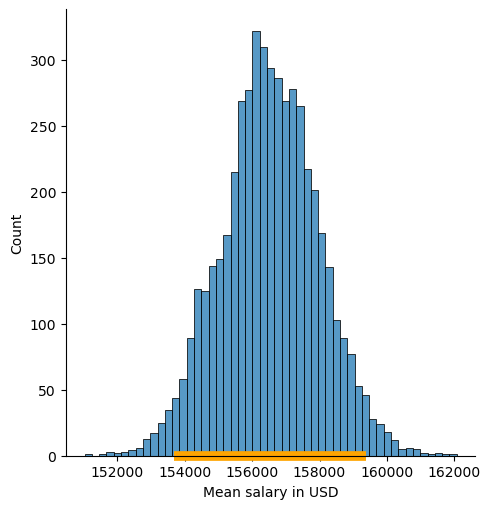

In [11]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(means_bootstrapped_Msociety, 2.5, method='higher')
right_end =  np.percentile(means_bootstrapped_Msociety, 97.5, method='higher')
print('The 95% boostsrap confidence interval is:\n', left_end, '-', right_end)

# visualize results
ax1 = sns.displot(means_bootstrapped_Msociety)
ax1.set(xlabel='Mean salary in USD')
# show line of values between 2.5 and 97.5 percentiles
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False)


### Question 4:
#### a)

In [12]:
#calculate the median salary
#create a df with exclusively hybrid's remote ratio
actual_mean_salary = salaries_df["salary_in_usd"].median()
hybrid_df = salaries_df[(salaries_df['remote_ratio'] == 'hybrid')]

In [13]:
def bootstrap_quantile(original_sample, column_name, num_replications, quantile):
    '''This function returns an array of bootstrapped sample medians:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples to draw '''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]] # the use of [[]] will return a df rather than series
    bstrap_quarter = np.empty(num_replications) # collection array for our estimates
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(n=original_sample_size, replace=True)
        resampled_median = bootstrap_sample.quantile(quantile, interpolation='higher')
        bstrap_quarter[i] = resampled_median
    
    return bstrap_quarter

def real_quantile_in_confience_interval(bstrap_quantile, actual_quantile_salary) :
    '''This funciton return a bolean value, True if the median is in the confidence interval
    bstrap_median: an array of values from which we calculate the confidence interval
    real_median_salary: the number that we check if in the confidence interval'''
    left_end = np.percentile(bstrap_quantile, 2.5, method='higher')
    right_end =  np.percentile(bstrap_quantile, 97.5, method='higher')
    flag = False
    if (left_end < actual_quantile_salary) & (actual_quantile_salary < right_end):
        flag = True
    return flag

In [14]:
#running the process 100 times
number_of_simulations = 100
size_of_sample = 150

median_in_confience_interval = np.empty(number_of_simulations)
for i in range(number_of_simulations):
    sample_quarter = hybrid_df.sample(size_of_sample)
    bstrap_quarter = bootstrap_quantile(sample_quarter, "salary_in_usd", 1000, 0.5)
    median_in_confience_interval[i] = real_quantile_in_confience_interval(bstrap_quarter, actual_mean_salary)



In [15]:
#checking the number of time with a True answer
count_true_median = np.count_nonzero(median_in_confience_interval)
print("The number of times that the real median is in the confidence interval: {} out of {}"
      .format(count_true_median, number_of_simulations))

The number of times that the real median is in the confidence interval: 98 out of 100


#### b)
##### The promise to a confident interval from the bootstrap method isn't kept.
##### As we've seen in the lecture, as well in our case, when the sampling process isn't random, the bootstrap method will not help us and will not provide us with a good confidence interval
##### That's because the bootstrap method itself is based on the fact that the sample represents the population, and in our case it's not true. bias sampling will lead to a bias confidence interval.

#### C)

In [16]:
number_of_simulations = 100
size_of_sample = 150
actual_quarter_salary = salaries_df["salary_in_usd"].quantile(0.25)

quarter_in_confience_interval = np.empty(number_of_simulations)
for i in range(number_of_simulations):
    sample_quarter = hybrid_df.sample(size_of_sample)
    bstrap_quarter = bootstrap_quantile(sample_quarter, "salary_in_usd", 1000, 0.25)
    quarter_in_confience_interval[i] = real_quantile_in_confience_interval(bstrap_quarter, actual_quarter_salary)

In [17]:
#checking the number of time with a True answer
count_true_quarted = np.count_nonzero(quarter_in_confience_interval)
print("The number of times that the real quarter is in the confidence interval: {} out of {} in comparison to {} in the median".format(count_true_quarted, number_of_simulations, count_true_median))


The number of times that the real quarter is in the confidence interval: 87 out of 100 in comparison to 98 in the median


##### The number of times the quarter values is in the confidence interval is smaller than the number of times the median value is in the confidence interval.
##### Our answer still won't change - The data we have is still biased, and the bootstrap method is still based on the assumption that the sample represents the population, which is not true in our case.

## Part 2 :

#### 1 )
With a very small sample, there may be increased bias in bootstrap estimates and higher variability in results. Due to the limited sample size, the generated bootstrap samples may not fully capture the true variability of the data, which may result in biased estimates or less precise confidence intervals.

#### 2)
##### a)
The statistic phenomenon that can explain the difference between the two results is the simpson's paradox. That's because theres a difference between the two groups, and when we combine them we get a different result.

##### b)
1) In the case of a black convicted, there is a higher chance that the judge will sentence him to death rather if it was a white convicted.

2) Theres' is higher number of black convicts than white convicts:

    262 white convicts and 440 black convicts.

    The number of black convicts is higher than the number of white convicts, and therefore the chance that a black convict will be sentenced to death is higher than the chance that a white convict will be sentenced to death.
